# Assignment 2: Coding Book

# Data Exploration

In [200]:
# !pip install keras-tuner
# !pip install pydot
!pip install graphviz 

In [1]:
# Import all necessary packages
import numpy as np
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

### 0.1. Data reading and examination

In [158]:
# Load and Read the  data for exploration
# training data
train_feature = pd.read_csv("train_feat.csv")
train_signal = pd.read_csv("train_signal.csv")

# test data
test_feature = pd.read_csv("test_feat.csv")
test_signal = pd.read_csv("test_signal.csv")

# train_feature data
print("Training train feature data")
# print(train_feature)
print(train_feature.info())
# train_signal data
print("Training train signal data")
print(train_signal)
print(train_feature.info())

print(train_feature.describe())




Training train feature data
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13062 entries, 0 to 13061
Columns: 190 entries, ID to F187
dtypes: float64(188), object(2)
memory usage: 18.9+ MB
None
Training train signal data
           ID Type     X0     X1     X2     X3     X4     X5     X6     X7  \
0      B00000    N -0.107 -0.100 -0.086 -0.078 -0.071 -0.057 -0.049 -0.035   
1      B00001    N  2.762  3.313  3.863  4.292  4.594  4.623  4.408  3.817   
2      B00002    N -0.246 -0.200 -0.159 -0.125 -0.101 -0.090 -0.084 -0.078   
3      B00003    ~  0.519  0.778  1.073  1.392  1.672  1.895  2.012  2.023   
4      B00004    ~  0.011 -0.103 -0.265 -0.371 -0.409 -0.422 -0.418 -0.411   
...       ...  ...    ...    ...    ...    ...    ...    ...    ...    ...   
13057  B13057    O  1.121  1.393  1.643  1.897  2.123  2.182  2.196  2.206   
13058  B13058    O -0.204 -0.190 -0.173 -0.152 -0.134 -0.117 -0.096 -0.072   
13059  B13059    O -0.364 -0.395 -0.434 -0.465 -0.406 -0.225  0.137  0.679

In [36]:
# Display the data
# Training data

# train_feature.head(15)
train_signal.head(15)


,ID,Type,X0,X1,X2,X3,X4,X5,X6,X7,...,X5990,X5991,X5992,X5993,X5994,X5995,X5996,X5997,X5998,X5999
0,B00000,N,-0.107,-0.100,-0.086,-0.078,-0.071,-0.057,-0.049,-0.035,...,-1.108,-1.072,-1.028,-0.978,-0.912,-0.862,-0.804,-0.724,-0.630,-0.499
1,B00001,N,2.762,3.313,3.863,4.292,4.594,4.623,4.408,3.817,...,-0.107,0.003,0.148,0.241,0.310,0.345,0.368,0.397,0.426,0.438
2,B00002,N,-0.246,-0.200,-0.159,-0.125,-0.101,-0.090,-0.084,-0.078,...,-0.113,-0.038,0.032,0.107,0.165,0.194,0.194,0.159,0.119,0.072
3,B00003,~,0.519,0.778,1.073,1.392,1.672,1.895,2.012,2.023,...,0.037,-0.052,-0.084,-0.099,-0.101,-0.090,-0.067,0.003,0.096,0.179
4,B00004,~,0.011,-0.103,-0.265,-0.371,-0.409,-0.422,-0.418,-0.411,...,0.776,0.829,0.763,0.481,0.126,-0.144,-0.224,-0.250,-0.222,-0.207
5,B00005,~,0.539,0.655,0.800,0.964,1.157,1.349,1.542,1.755,...,-1.708,-1.650,-1.563,-1.457,-1.351,-1.255,-1.158,-1.100,-1.033,-0.985
6,B00006,~,-0.927,-0.869,-0.782,-0.657,-0.473,-0.348,-0.261,-0.203,...,-1.409,-1.274,-1.120,-0.927,-0.657,-0.493,-0.396,-0.338,-0.309,-0.338
7,B00007,O,-0.280,-0.481,-0.546,-0.594,-0.651,-0.659,-0.634,-0.626,...,-0.046,-0.022,-0.006,0.010,0.018,0.018,0.026,0.026,0.034,0.034
8,B00008,O,-0.393,-0.336,-0.288,-0.256,-0.224,-0.191,-0.159,-0.135,...,-0.280,-0.256,-0.232,-0.207,-0.183,-0.151,-0.127,-0.103,-0.087,-0.078
9,B00009,~,-0.130,-0.211,-0.308,-0.421,-0.531,-0.638,-0.748,-0.861,...,1.419,1.199,1.044,0.992,0.960,0.944,0.908,0.850,0.775,0.701


In [93]:
train_feature.isnull().sum()

ID      False
Type    False
F0      False
F1      False
F2      False
        ...  
F183    False
F184    False
F185    False
F186    False
F187    False
Length: 190, dtype: bool

(array([7721.,    0.,    0.,  324.,    0.,    0., 3857.,    0.,    0.,
        1160.]),
 array([0. , 0.3, 0.6, 0.9, 1.2, 1.5, 1.8, 2.1, 2.4, 2.7, 3. ]),
 <BarContainer object of 10 artists>)

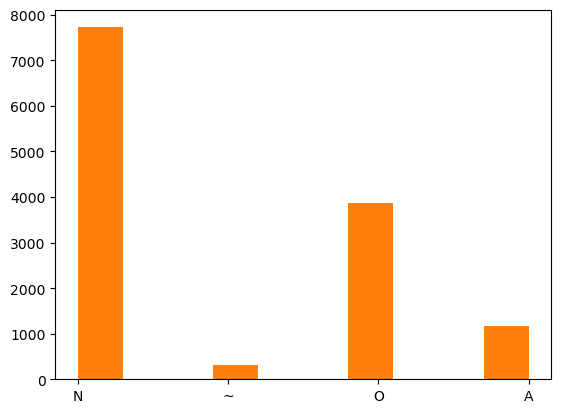

In [20]:
# Check the distribution of classifications for the training data

# training feature data
y_feature_train = train_feature.Type.values
plt.hist(y_feature_train)

# training signal data
y_signal_train = train_signal.Type.values
plt.hist(y_signal_train)

In [28]:
# Drop non-numeric columns
# training features
cleaned_train_feat_numeric = train_feature.select_dtypes(include=[float, int])

# Handle missing values (fill with mean, median, or other appropriate strategies)
cleaned_train_feat_numeric.fillna(cleaned_train_feat_numeric.mean(), inplace=True)


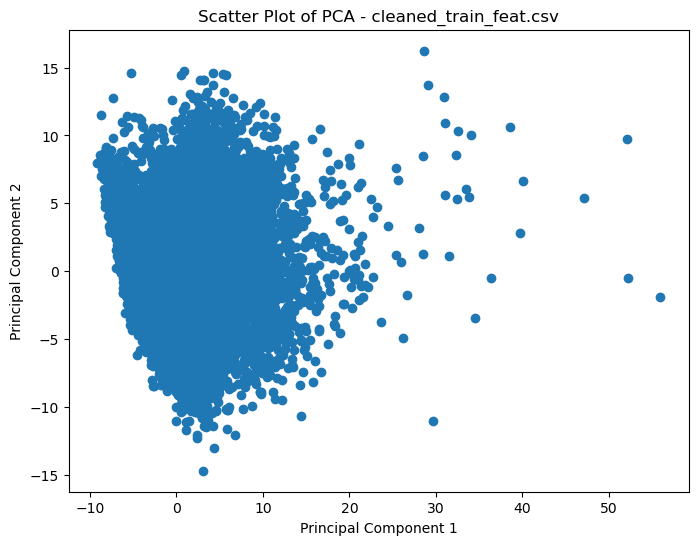

In [30]:
# Visualization through PCA

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Scale the features
scaler = StandardScaler()
cleaned_train_feat_scaled = scaler.fit_transform(cleaned_train_feat_numeric)


pca = PCA(n_components=2)
cleaned_train_feat_pca = pca.fit_transform(cleaned_train_feat_scaled)

# Example plot: Scatter plot of the first two principal components
plt.figure(figsize=(8, 6))
plt.scatter(cleaned_train_feat_pca[:, 0], cleaned_train_feat_pca[:, 1])
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of PCA - cleaned_train_feat.csv')
plt.show()

## 1. Modelling experiment 1 (Feature-based approach)
- Cross validation for hyper-parameter tuning and evaluation of the fitted models. 
- ML models for experiment is Logistic Regression, Random Forests, SVMs

In [102]:
train_feature.head(30)


,ID,Type,F0,F1,F2,F3,F4,F5,F6,F7,...,F178,F179,F180,F181,F182,F183,F184,F185,F186,F187
0,B00000,N,-5.0,8.0,3.0,0.0,0.0,3.0,0.077445,0.041760,...,0.153967,14.645908,2.897634,0.0,0.0,65.789474,0.0,73.619632,85.227273,0.920
1,B00001,N,-8.0,8.0,0.0,0.0,0.0,0.0,0.015513,0.017613,...,0.424268,9.350336,0.004927,0.0,0.0,58.365759,0.0,61.791967,64.102564,1.168
2,B00002,N,-8.0,8.0,0.0,0.0,0.0,0.0,0.011311,0.017416,...,0.188311,14.725601,2.380945,0.0,0.0,61.983471,0.0,62.860136,64.655172,0.984
3,B00003,~,25.0,1.0,26.0,0.0,0.0,7.0,0.517033,0.627826,...,0.117397,3.525680,-0.580148,29.0,0.0,66.225166,9.0,117.416830,197.368421,1.256
4,B00004,~,17.0,1.0,20.0,1.0,1.0,2.0,0.577912,0.803246,...,0.056104,4.242599,-1.011361,7.0,0.0,92.024540,6.0,124.223602,202.702703,1.096
5,B00005,~,22.0,0.0,22.0,0.0,3.0,7.0,0.439205,0.620939,...,0.273350,6.135661,0.590243,14.0,0.0,47.846890,4.0,100.840336,197.368421,1.480
6,B00006,~,9.0,1.0,10.0,0.0,0.0,5.0,0.418228,0.591676,...,0.319184,7.349628,-0.104063,16.0,0.0,58.823529,3.0,114.394662,202.702703,1.480
7,B00007,O,-4.0,11.0,7.0,0.0,1.0,4.0,0.174345,0.278268,...,0.113599,9.052018,1.816864,2.0,0.0,66.815145,3.0,79.681275,166.666667,0.992
8,B00008,O,-20.0,20.0,0.0,0.0,0.0,0.0,0.003003,0.004154,...,0.065263,10.293430,1.918406,1.0,0.0,69.444444,2.0,72.904010,202.702703,0.872
9,B00009,~,16.0,0.0,16.0,0.0,0.0,3.0,0.272816,0.358785,...,0.362117,18.568379,-2.564082,5.0,0.0,57.251908,2.0,71.856287,202.702703,1.256


In [250]:
# Handle Missing values

train_feature.dropna(inplace = True)

In [251]:
# Feature Data

X_train_feat = train_feature.iloc[:, 2:].values
y_train_feat = train_feature.iloc[:, 1].values

print("X_train_feat.shape", X_train_feat.shape)
print("y_train_feat.shape", y_train_feat.shape)


X_train_feat.shape (13054, 188)
y_train_feat.shape (13054,)


In [257]:
# Split into training and validation sets
X_feat_train, X_feat_test, y_feat_train, y_feat_test = train_test_split(X_train_feat, y_train_feat, test_size=0.2, random_state=42)


In [128]:
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

from sklearn.model_selection import StratifiedKFold, StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import StandardScaler

# As we have a relatively large training sample size, we opted to use "Stratified" (instead of k-fold cross validation) to ensure that the class distribution is the same for training and validation. 
# "Stratified" is used to ensure that the random state is controlled for reproducibility.

random_seed=1234
cv = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=random_seed)

EXP = {} # All experiments will be kept in an EXP dictionary.
# Within the cv we defined, we can retrieve the train and validation dataset.



# Random Foreset (RF
Grid search is used for hyperparameters with good values

RF hyper parameters for considerations

Penalty type:
Solver: for determinin the optimization algorithm
Regularization parameter: for controlling the regularization degree

In [252]:
nan_values = X_train_feat[np.isnan(X_train_feat)]
print(nan_values)

[]


In [253]:
# Data Normalization using StandardScaler
scaler = StandardScaler()
X_train_feat_scaled = scaler.fit_transform(X_train_feat)


In [258]:
# Data Normalization using StandardScaler
scaler = StandardScaler()
X_feat_train_scaled = scaler.fit_transform(X_feat_train)

In [254]:
# RF with Dimensionlity Reduction PCA

from sklearn.pipeline import Pipeline
from sklearn.feature_selection import SelectFromModel, SelectKBest, mutual_info_classif
#from sklearn.preprocessing import StandardScaler


RF = RandomForestClassifier(random_state=1234)
# Create a pipeline
pipe = Pipeline(steps=[('reduce_dim',PCA()),                          
                       ("classify", RF)])
param_grid = [

    {
    'reduce_dim':[PCA()],
    'reduce_dim__n_components':[20, 30, 50, 100],
    'classify__n_estimators': [100, 1000, 2000],
    'classify__criterion' :['gini','entropy'],
    'classify__max_depth': [10, 30, None],        
    'classify__max_features': ['sqrt','log2'],
    #'classify__min_samples_split': [2, 5],
    },    
]


# Create a grid_search of the pipeline, then fit the model with best parameters
#grid_search = grid_searchCV(pipe, param_grid, cv=cv, scoring='roc_auc', verbose=2, n_jobs=-1, refit=True)
grid_search = RandomizedSearchCV(pipe, param_grid, cv=cv, scoring='roc_auc',random_state=1234, verbose=3, n_jobs =-1, refit=True)
grid_search.fit(X_train_feat_scaled,y_train_feat)

EXP["Exp2_RF_PCA"]=grid_search

#print("-- Detailed CV results from the grid search:\n{}".format(grid_search.cv_results_))
print('-- Best score: {}'.format(grid_search.best_score_))
print("-- Best parameters: {}".format(grid_search.best_params_))

Fitting 1 folds for each of 10 candidates, totalling 10 fits


C:\Users\COLD-FIRE\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan]
  warnings.warn(


-- Best score: nan
-- Best parameters: {'reduce_dim__n_components': 50, 'reduce_dim': PCA(n_components=50), 'classify__n_estimators': 1000, 'classify__max_features': 'sqrt', 'classify__max_depth': 10, 'classify__criterion': 'gini'}


In [224]:
# RF
RF = RandomForestClassifier(random_state=1234)

# Define the hyperparameters to tune
param_grid = {    
    'n_estimators':[100, 1000, 2000],
    'max_depth' : [5, 10, 30, None],
    'criterion' :['gini', 'entropy'],
    'max_features': ['sqrt','log2'],    
    'min_samples_split': [2, 5, 10],
}

# Create the GridSearchCV object
# grid_search = GridSearchCV(RF, param_grid, cv=5, scoring = 'roc_auc', verbose = 3, n_jobs = -1, refit = True)

# RandomizedSearchCV
grid_search = RandomizedSearchCV(RF, param_grid, cv=5, scoring='roc_auc', n_iter=20, verbose=3, n_jobs=-1, refit=True)

# Perform Grid Search on the training data
# grid_search.fit(X_train_feat, y_train_feat)
grid_search.fit(X_feat_train_scaled, y_feat_train)

EXP['Exp1_RF']=grid_search


print("-- Detailed CV results from the grid search:\n{}".format(grid_search.cv_results_))
print('-- Best score: {}'.format(grid_search.best_score_))
print("-- Best parameters: {}".format(grid_search.best_params_))

Fitting 5 folds for each of 20 candidates, totalling 100 fits


C:\Users\COLD-FIRE\anaconda3\lib\site-packages\sklearn\model_selection\_search.py:969: UserWarning: One or more of the test scores are non-finite: [nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan nan
 nan nan]
  warnings.warn(


-- Detailed CV results from the grid search:
{'mean_fit_time': array([128.62075028, 112.15734887,   3.54819999, 121.52894912,
         5.88130975,  69.93340058, 341.60298047,  96.17579989,
         9.63780003,  21.22020049, 172.66607299,  17.47140117,
       131.99048004, 155.80890665,   4.2716258 ,  36.91862025,
        42.49000101,   3.81579962,  17.47159939, 121.83786726]), 'std_fit_time': array([2.06590253, 1.39262177, 0.10292852, 2.83901639, 0.11165491,
       1.16848356, 6.8152932 , 1.14658198, 0.16292147, 0.62609215,
       2.76883926, 0.57515673, 1.16044503, 8.86534515, 0.27311077,
       1.01544456, 0.72066449, 0.17251906, 0.36850421, 1.70095647]), 'mean_score_time': array([0.01579905, 0.00919995, 0.00099978, 0.00360045, 0.0013999 ,
       0.00120015, 0.00120039, 0.00119972, 0.00119987, 0.00240054,
       0.00159988, 0.0013989 , 0.00140057, 0.00100055, 0.00279913,
       0.00120053, 0.0021986 , 0.00140057, 0.00150404, 0.00080051]), 'std_score_time': array([1.01256181e-02, 1.59

In [ ]:
# Evaluate the model
# Instantiate the RandomForestClassifier with the best parameters
rf_model = RandomForestClassifier(n_estimators=2000,
                                  min_samples_split=2,
                                  max_features='log2',
                                  max_depth=None,
                                  criterion='gini')

# Fit the model to training data
rf_model.fit(X_feat_train_scaled, y_feat_train)

# Evaluate the model
acc_feat = rf_model.score(X_feat_test, y_feat_test)
print(f"Accuracy of feature-based model: {acc_feat}")


In [226]:
test_feature

,ID,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F178,F179,F180,F181,F182,F183,F184,F185,F186,F187
0,C00000,-1.0,6.0,5.0,0.0,0.0,3.0,0.068267,0.107653,0.110862,...,0.092296,27.957417,4.718421,0.0,0.0,53.956835,0.0,55.970149,70.093458,1.152
1,C00001,1.0,4.0,5.0,0.0,0.0,5.0,0.098701,0.164816,0.168081,...,0.082007,27.345269,4.703704,0.0,0.0,54.054054,0.0,56.550424,79.787234,1.160
2,C00002,-6.0,10.0,2.0,-1.0,1.0,3.0,0.126967,0.106857,0.059632,...,0.247711,10.088347,2.053699,2.0,0.0,65.934066,0.0,72.859745,80.645161,0.936
3,C00003,-3.0,6.0,3.0,0.0,0.0,3.0,0.077065,0.050373,0.057065,...,0.447685,13.327618,-0.482786,0.0,0.0,58.823529,0.0,65.323898,72.115385,1.088
4,C00004,-2.0,3.0,1.0,0.0,0.0,1.0,0.071738,0.055568,0.069081,...,0.155647,16.224950,3.086384,0.0,0.0,58.479532,0.0,63.124671,69.444444,1.088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,C03995,-4.0,4.0,0.0,0.0,0.0,0.0,0.025978,0.040171,0.053756,...,0.028571,18.286628,-0.481903,0.0,0.0,51.635112,0.0,52.333188,55.147059,1.192
3996,C03996,-13.0,15.0,2.0,0.0,0.0,2.0,0.017802,0.030409,0.024488,...,0.303710,6.877357,0.771652,0.0,0.0,65.359477,0.0,66.006601,68.181818,0.936
3997,C03997,-3.0,9.0,6.0,0.0,0.0,2.0,0.326297,0.514822,0.439052,...,0.081445,7.366540,0.387589,1.0,0.0,58.823529,0.0,67.453626,125.000000,1.352
3998,C03998,-19.0,19.0,0.0,0.0,0.0,0.0,0.013764,0.014085,0.017368,...,0.320255,8.350285,0.673268,1.0,0.0,76.726343,0.0,78.740157,82.417582,0.792


## SVM

In [ ]:
# SVM for linear and RBF kernels



## Prepare for Submission

In [227]:
test_feature

,ID,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F178,F179,F180,F181,F182,F183,F184,F185,F186,F187
0,C00000,-1.0,6.0,5.0,0.0,0.0,3.0,0.068267,0.107653,0.110862,...,0.092296,27.957417,4.718421,0.0,0.0,53.956835,0.0,55.970149,70.093458,1.152
1,C00001,1.0,4.0,5.0,0.0,0.0,5.0,0.098701,0.164816,0.168081,...,0.082007,27.345269,4.703704,0.0,0.0,54.054054,0.0,56.550424,79.787234,1.160
2,C00002,-6.0,10.0,2.0,-1.0,1.0,3.0,0.126967,0.106857,0.059632,...,0.247711,10.088347,2.053699,2.0,0.0,65.934066,0.0,72.859745,80.645161,0.936
3,C00003,-3.0,6.0,3.0,0.0,0.0,3.0,0.077065,0.050373,0.057065,...,0.447685,13.327618,-0.482786,0.0,0.0,58.823529,0.0,65.323898,72.115385,1.088
4,C00004,-2.0,3.0,1.0,0.0,0.0,1.0,0.071738,0.055568,0.069081,...,0.155647,16.224950,3.086384,0.0,0.0,58.479532,0.0,63.124671,69.444444,1.088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,C03995,-4.0,4.0,0.0,0.0,0.0,0.0,0.025978,0.040171,0.053756,...,0.028571,18.286628,-0.481903,0.0,0.0,51.635112,0.0,52.333188,55.147059,1.192
3996,C03996,-13.0,15.0,2.0,0.0,0.0,2.0,0.017802,0.030409,0.024488,...,0.303710,6.877357,0.771652,0.0,0.0,65.359477,0.0,66.006601,68.181818,0.936
3997,C03997,-3.0,9.0,6.0,0.0,0.0,2.0,0.326297,0.514822,0.439052,...,0.081445,7.366540,0.387589,1.0,0.0,58.823529,0.0,67.453626,125.000000,1.352
3998,C03998,-19.0,19.0,0.0,0.0,0.0,0.0,0.013764,0.014085,0.017368,...,0.320255,8.350285,0.673268,1.0,0.0,76.726343,0.0,78.740157,82.417582,0.792


In [241]:
test_feature

,ID,F0,F1,F2,F3,F4,F5,F6,F7,F8,...,F178,F179,F180,F181,F182,F183,F184,F185,F186,F187
0,C00000,-1.0,6.0,5.0,0.0,0.0,3.0,0.068267,0.107653,0.110862,...,0.092296,27.957417,4.718421,0.0,0.0,53.956835,0.0,55.970149,70.093458,1.152
1,C00001,1.0,4.0,5.0,0.0,0.0,5.0,0.098701,0.164816,0.168081,...,0.082007,27.345269,4.703704,0.0,0.0,54.054054,0.0,56.550424,79.787234,1.160
2,C00002,-6.0,10.0,2.0,-1.0,1.0,3.0,0.126967,0.106857,0.059632,...,0.247711,10.088347,2.053699,2.0,0.0,65.934066,0.0,72.859745,80.645161,0.936
3,C00003,-3.0,6.0,3.0,0.0,0.0,3.0,0.077065,0.050373,0.057065,...,0.447685,13.327618,-0.482786,0.0,0.0,58.823529,0.0,65.323898,72.115385,1.088
4,C00004,-2.0,3.0,1.0,0.0,0.0,1.0,0.071738,0.055568,0.069081,...,0.155647,16.224950,3.086384,0.0,0.0,58.479532,0.0,63.124671,69.444444,1.088
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3995,C03995,-4.0,4.0,0.0,0.0,0.0,0.0,0.025978,0.040171,0.053756,...,0.028571,18.286628,-0.481903,0.0,0.0,51.635112,0.0,52.333188,55.147059,1.192
3996,C03996,-13.0,15.0,2.0,0.0,0.0,2.0,0.017802,0.030409,0.024488,...,0.303710,6.877357,0.771652,0.0,0.0,65.359477,0.0,66.006601,68.181818,0.936
3997,C03997,-3.0,9.0,6.0,0.0,0.0,2.0,0.326297,0.514822,0.439052,...,0.081445,7.366540,0.387589,1.0,0.0,58.823529,0.0,67.453626,125.000000,1.352
3998,C03998,-19.0,19.0,0.0,0.0,0.0,0.0,0.013764,0.014085,0.017368,...,0.320255,8.350285,0.673268,1.0,0.0,76.726343,0.0,78.740157,82.417582,0.792


In [243]:
# Handle Missing values in Test data

test_feature = test_feature.fillna(0)

test_feature.shape

(4000, 189)

In [244]:
# Evaluate the model
X_test_feat = test_feature.iloc[:,1:].values

feat_predictions = rf_model.predict(X_test_feat)
feat_predictions


array(['O', 'O', 'O', ..., 'O', 'O', 'O'], dtype=object)

In [155]:
# Submission DatafRame

submission = pd.DataFrame({'ID': test_feature['ID'], 'Predicted': feat_predictions})
submission

,ID,Predicted
0,C00000,O
1,C00001,O
2,C00002,O
3,C00003,O
4,C00004,O
...,...,...
3995,C03995,O
3996,C03996,O
3997,C03997,O
3998,C03998,O


In [156]:
# Write the submission to a file
submission.to_csv('submission_output.csv', index=False)

# Deep Neural Network

In [163]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D
from tensorflow.keras.callbacks import EarlyStopping
from kerastuner.tuners import RandomSearch

C:\Users\COLD-FIRE\AppData\Local\Temp\ipykernel_26576\2814480698.py:12: DeprecationWarning: `import kerastuner` is deprecated, please use `import keras_tuner`.
  from kerastuner.tuners import RandomSearch


In [165]:
train_signal.isnull().sum()

ID         0
Type       0
X0         0
X1         0
X2         0
        ... 
X5995    479
X5996    479
X5997    479
X5998    480
X5999    480
Length: 6002, dtype: int64

In [173]:
data_signal = train_signal.fillna(0)

In [174]:
# Drop 'ID' and 'Type' columns
X_signal = data_signal.drop(['ID', 'Type'], axis=1)
y_signal = data_signal['Type']

In [175]:
# Split the data into training and validation sets
X_train_signal, X_val_signal, y_train_signal, y_val_signal = train_test_split(X_signal, y_signal, test_size=0.2, random_state=42)

In [177]:
cat_to_num = {'A': 0, 'N': 1, 'O': 2, '~': 3}
num_to_cat = {0: 'A', 1: 'N', 2: 'O', 3: '~'}

def convert_categorical_values(data, mapping):
    # Check if input is a pandas column or array
    if isinstance(data, pd.Series):
        return data.map(mapping)
    elif isinstance(data, list):
        return [mapping[val] for val in data]
    else:
        raise ValueError("Input data must be a pandas column or array")

In [178]:
# Preprocess the data
X_train_signal = np.asarray(X_train_signal).reshape(-1, 6000, 1)
X_val_signal = np.asarray(X_val_signal).reshape(-1, 6000, 1)
y_train_signal =convert_categorical_values(y_train_signal,cat_to_num)
y_val_signal = convert_categorical_values(y_val_signal,cat_to_num)

<AxesSubplot:>

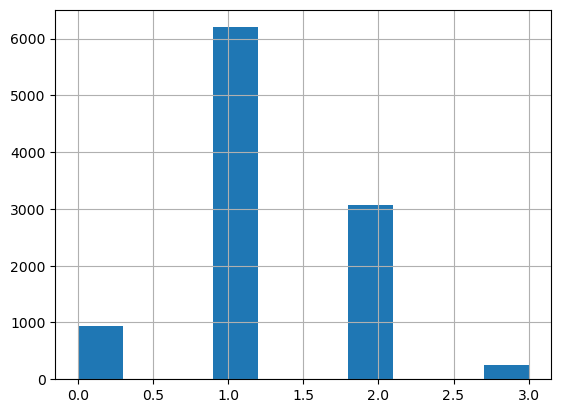

In [179]:
y_train_signal.hist()

<AxesSubplot:>

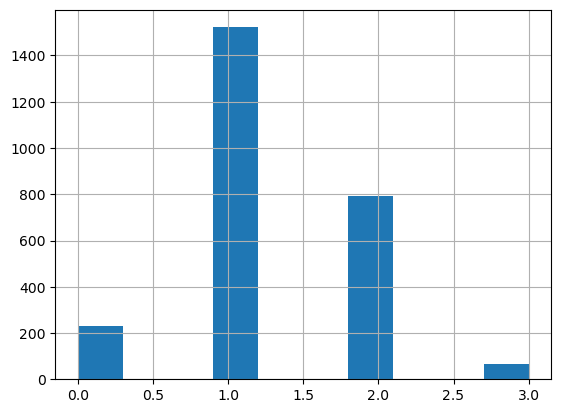

In [180]:
y_val_signal.hist()

In [181]:
y_train_signal = pd.get_dummies(y_train_signal)
y_val_signal = pd.get_dummies(y_val_signal)

In [182]:
y_train_signal.head()

,0,1,2,3
1523,0,1,0,0
6306,0,0,1,0
1110,0,0,1,0
10721,0,1,0,0
1406,1,0,0,0


In [188]:
# Define model builder function for Keras Tuner
def build_model(hp):
    model = keras.Sequential()
    model.add(Conv1D(filters=hp.Int('filters', min_value=16, max_value=128, step=16), 
                     kernel_size=hp.Choice('kernel_size', values=[3, 5, 7, 9, 11]), 
                     activation='relu', 
                     input_shape=(6000, 1)))
    model.add(MaxPooling1D(pool_size=2))
    model.add(Flatten())
    model.add(Dense(units=hp.Int('units', min_value=128, max_value=512, step=32), activation='relu'))
    model.add(Dropout(rate=hp.Float('dropout', min_value=0.0, max_value=0.5, step=0.05)))
    model.add(Dense(units=4, activation='softmax'))
    model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate', values=[1e-2, 1e-3, 1e-4, 1e-6])), 
                  loss='categorical_crossentropy', 
                  metrics=['accuracy'])
    return model

In [189]:
# Define tuner using RandomSearch
tuner = RandomSearch(build_model, objective='val_accuracy', max_trials=10, executions_per_trial=2)

In [190]:
# Define early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=5)

In [193]:
# Fit tuner to training data
tuner.search(X_train_signal, y_train_signal, epochs=50, validation_split=0.2, callbacks=[early_stopping])

Trial 1 Complete [00h 35m 25s]
val_accuracy: 0.5753588378429413

Best val_accuracy So Far: 0.5753588378429413
Total elapsed time: 00h 53m 23s

Search: Running Trial #2

Value             |Best Value So Far |Hyperparameter
96                |80                |filters
9                 |9                 |kernel_size
480               |320               |units
0.05              |0.05              |dropout
0.0001            |0.01              |learning_rate

Epoch 1/2
 54/262 [=====>........................] - ETA: 10:32 - loss: 1.1888 - accuracy: 0.5075

KeyboardInterrupt: 

In [194]:
# Evaluate best model on test data
best_model = tuner.get_best_models(num_models=1)[0]
loss, accuracy = best_model.evaluate(X_val_signal, y_val_signal)
print('Best model:')
print(best_model.summary())
print('Test accuracy:', accuracy)

82/82 [==============================] - 88s 1s/step - loss: 1.0151 - accuracy: 0.5809
Best model:
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv1d (Conv1D)             (None, 5992, 80)          800       
                                                                 
 max_pooling1d (MaxPooling1D  (None, 2996, 80)         0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 239680)            0         
                                                                 
 dense (Dense)               (None, 320)               76697920  
                                                                 
 dropout (Dropout)           (None, 320)               0         
                                                                 
 dense_1 (Dense)       

In [203]:
tf.keras.utils.plot_model(best_model, to_file='deep-model.png', show_shapes=True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [204]:
# Evaluate the model
_, acc_signal = best_model.evaluate(X_val_signal, y_val_signal)
print(f"Accuracy of end-to-end learning model: {acc_signal:.2f}")

82/82 [==============================] - 89s 1s/step - loss: 1.0151 - accuracy: 0.5809
Accuracy of end-to-end learning model: 0.58


In [205]:
test_signal.head()

,ID,X0,X1,X2,X3,X4,X5,X6,X7,X8,...,X5990,X5991,X5992,X5993,X5994,X5995,X5996,X5997,X5998,X5999
0,C00000,-0.169,-0.174,-0.184,-0.189,-0.200,-0.210,-0.221,-0.226,-0.226,...,0.375,0.386,0.386,0.360,0.323,0.282,0.240,0.184,0.132,0.090
1,C00001,-0.184,-0.174,-0.169,-0.164,-0.158,-0.158,-0.158,-0.153,-0.153,...,-0.086,-0.117,-0.143,-0.148,-0.153,-0.153,-0.153,-0.153,-0.153,-0.158
2,C00002,1.050,1.622,2.143,2.552,2.653,2.675,2.614,2.249,1.734,...,-1.342,-1.354,-1.365,-1.370,-1.376,-1.370,-1.365,-1.354,-1.342,-1.326
3,C00003,2.259,2.667,3.046,3.376,3.583,3.579,3.334,2.872,2.514,...,-0.119,-0.119,-0.119,-0.116,-0.114,-0.109,-0.104,-0.097,-0.090,-0.083
4,C00004,-0.203,-0.203,-0.201,-0.201,-0.201,-0.199,-0.194,-0.189,-0.185,...,-0.008,0.020,0.039,0.044,0.046,0.046,0.049,0.049,0.051,0.051


In [208]:
# Extract the features from the test data (assuming 'ID' column is present)
test_data = test_signal.fillna(0)
features = test_signal.drop(['ID'], axis=1).values

In [209]:
# Reshape the features to match the input shape of the model
features = np.asarray(features).reshape(-1, 6000, 1)

In [210]:
# Make predictions using the loaded model
predictions = best_model.predict(features)

125/125 [==============================] - 137s 1s/step


In [211]:
df = pd.DataFrame(predictions)
df.columns = ["0","1","2","3"]

In [212]:
def translate_predicted_column(df):
    # Get the column name with the highest value for each row
    predicted_column = df.idxmax(axis=1)
    
    # Create a new DataFrame with the predicted column added
    new_df = df.copy()
    new_df['predicted'] = predicted_column
    
    return new_df

In [213]:
pred = translate_predicted_column(df)
pred.columns

Index(['0', '1', '2', '3', 'predicted'], dtype='object')

In [214]:
pred = convert_categorical_values(pred.predicted,num_to_cat)

In [215]:
len(pred)

4000

In [216]:
len(test_data)

4000

In [217]:
# Create a new dataframe with the predicted values and the ID column
output_df = pd.DataFrame({'ID': test_data['ID'], 'predicted': pred})

In [218]:
# Print the output dataframe
print(output_df)
# print(output_df.sample(100))

          ID predicted_type
0     C00000              N
1     C00001              N
2     C00002              N
3     C00003              N
4     C00004              N
...      ...            ...
3995  C03995              N
3996  C03996              N
3997  C03997              N
3998  C03998              N
3999  C03999              N

[4000 rows x 2 columns]


<AxesSubplot:>

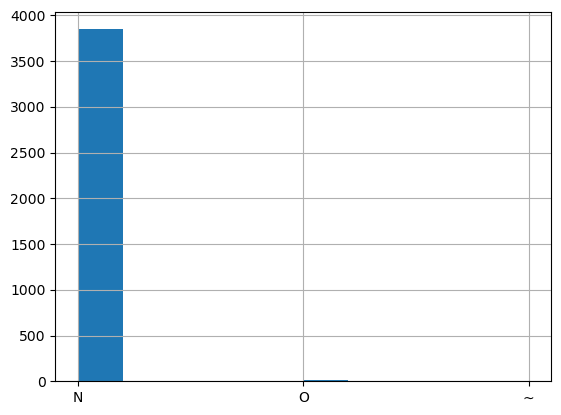

In [219]:
output_df.predicted.hist()

In [220]:
output_df.to_csv("submission_sig.csv")